In [194]:
from google.colab import files
 
 
uploaded = files.upload()

Saving train(9).csv to train(9) (2).csv


In [195]:
from google.colab import files
 
 
uploaded = files.upload()

Saving test.csv to test (1).csv


In [196]:
from google.colab import files
 
 
uploaded = files.upload()

Saving gender_submission.csv to gender_submission (2).csv


In [197]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sy
from sympy import symbols, cos, diff
import math as mth

train = pd.read_csv("train(9).csv")
test = pd.read_csv("test.csv")
gender = pd.read_csv("gender_submission.csv")

In [198]:
x1 = train['Sex']
x2 = train['Age']
x3 = train['SibSp']
x4 = train['Parch']
x5 = train['Fare']
y = train['Survived']

In [199]:
num = train['Sex'].mode()[0]
train['Sex'].fillna(value = num,inplace = True)
train['Sex']

x1 = train['Sex']

In [200]:
temp = x1
n = len(temp)

for i in range(0,n):
  if temp[i] == 'male':
    temp[i] = 1
  elif temp[i] == 'female':
    temp[i] = 0
 # elif temp[i] == []:
#  temp[i] = 0

x1 = temp

print(x1)



0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64


In [201]:
location = train['Age'].mode()[0]
train['Age'].fillna(value = location,inplace = True)
train['Age']

x2 = train['Age']

In [202]:
#ag = train['Age']
#m = len(ag)
#for i in range(0,m):
 # if ag[i] == []:
  #  ag[i] = 10

#x2 = ag

In [203]:
def grad_fun1(w1,w2, w3, w4, w5):
    k = 0.0
    for i in range (0,891):
        k += (w1*x1[i] + w2*x2[i] + w3*x3[i] + w4*x4[i] + w5*x5[i] - y[i])*x1[i]
    return k/(len(train))

def grad_fun2(w1,w2, w3, w4, w5):
    k = 0.0
    for i in range (0,891):
        k += (w1*x1[i] + w2*x2[i] + w3*x3[i] + w4*x4[i] + w5*x5[i] - y[i])*x2[i]
    return k/(len(train))

def grad_fun3(w1, w2, w3, w4, w5):
    k = 0.0
    for i in range (0,891):
        k += (w1*x1[i] + w2*x2[i] + w3*x3[i] + w4*x4[i] + w5*x5[i] - y[i])*x3[i]
    return k/(len(train))
def grad_fun4(w1, w2, w3, w4, w5):
    k = 0.0
    for i in range (0,891):
       k += (w1*x1[i] + w2*x2[i] + w3*x3[i] + w4*x4[i] + w5*x5[i] - y[i])*x4[i]
    return k/(len(train))
def grad_fun5(w1, w2, w3, w4, w5):
    k = 0.
    for i in range (1,891):
        k += (w1*x1[i] + w2*x2[i] + w3*x3[i] + w4*x4[i] + w5*x5[i] - y[i])*x5[i]
    return k/(len(train))

In [204]:
x = 0.00005
w1 = 1.0000
w2 = 1.00
w3 = 1
w4 = 1
w5 = 1

for i in range (1, 2000):
    w1 = w1 - x*grad_fun1(w1, w2, w3, w4, w5)
    w2 = w2 - x*grad_fun2(w1, w2, w3, w4, w5)
    w3 = w3 - x*grad_fun3(w1, w2, w3, w4, w5)
    w4 = w4 - x*grad_fun4(w1, w2, w3, w4, w5)
    w5 = w5 - x*grad_fun5(w1, w2, w3, w4, w5)

In [193]:
from sys import ps1
p1 = test['Sex']
p2 = test['Age']
x3t = test['SibSp']
x4t = test['Parch']
x5t = test['Fare']
yt = gender['Survived']
h = yt


n1 = test['Sex'].mode()[0]
test['Sex'].fillna(value = n1,inplace = True)
test['Sex']

p1 = test['Sex']

r = len(p1)

for i in range(0,r):
  if p1[i] == 'male':
    p1[i] = 1
  elif p1[i] == 'female':
    p1[i] = 0
 # elif p1[i] == []:
#  p1[i] = 0

x1t = p1

n2 = test['Age'].mode()[0]
test['Age'].fillna(value = n2,inplace = True)
test['Age']

p2 = test['Age']


#l = len(p2)
#for i in range(0,l):
# if p2[i] == []:
#   p2[i] = 10

x2t = p2


for i in range(1,417):
  a=x1t[i]
  e=x2t[i]
  b=x3t[i]
  c=x4t[i]
  d=x5t[i]
  h[i] = a*w1 + e*w2 + b*w3 + c*w4 + d*w5

print(x2t)

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    21.0
414    39.0
415    38.5
416    21.0
417    21.0
Name: Age, Length: 418, dtype: float64


891


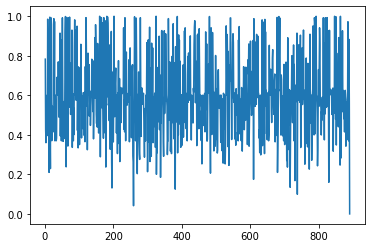

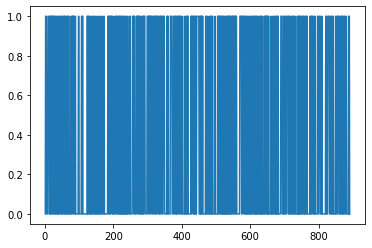

In [205]:
x = train['PassengerId']
z = [0]*891
k = [0]*891
print(len(z))
for i in range(0,890):
  z[i] = x1[i]*w1 + x2[i]*w2 + x3[i]*w3 + x4[i]*w4 + x5[i]*w5
  k[i] = 1/(1+mth.exp(-z[i]))

u = train['Survived'] 
plt.plot(x,k)
plt.show()
plt.plot(x,u)
plt.show()

In [206]:
a = 0
p = gender['Survived'] 
d = [0]*418
r = [0]*418
flag = [0]*418

for i in range(0,418):
  d[i] = x1t[i]*w1 + x3t[i]*w3 + x4t[i]*w4 + x5t[i]*w5
  r[i] = 1/(1+mth.exp(-d[i]))
  if r[i]<0.775:
    flag[i]=0
  elif r[i]>=0.775:
    flag[i]=1

for i in range(0,418):
  if flag[i]==p[i]:
    a=a+1
print("accuracy is", a/418*100,"percent")

accuracy is 56.2200956937799 percent


In [207]:
#Arpit
x1=1
x3=0
x4=0
x5=7.5

d = x1*w1 + x3*w3 + x4*w4 + x5*w5
r = 1/(1+mth.exp(-d))

if r<0.675:
  print("dead")
elif r>=0.675:
  print("alive")

alive


In [208]:
#Shreya
x1=0
x3=1
x4=1
x5=512

d = x1*w1 + x3*w3 + x4*w4 + x5*w5
r = 1/(1+mth.exp(-d))

if r<0.675:
  print("dead")
elif r>=0.775:
  print("alive")

dead
